# **STROJNO UČENJE** 22./23.
# Vježba 04 - Naivni Bayes

Algoritme imena [Naivni Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) koristimo u strojnom učenju za klasifikacijske zadatke. Naivni Bayes klasifikatori tvore familiju algoritama za klasifikaciju s glavnom pretpostavkom o međusobnoj nezavisnosti nezavisnih varijabli, tj. značajki.

Ime dolazi od upotrebe tzv. [Bayesovog teorema](https://en.wikipedia.org/wiki/Bayes%27_theorem): $$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$ gdje je:
- $P(A), P(B)$ vjerojatnosti događaja $A,B$,
- $P(A|B)$ [uvjetna vjerojatnost](https://en.wikipedia.org/wiki/Conditional_probability) da se dogodio $A$ ako se dogodio $B$,
- $P(B|A)$ uvjetna vjerojatnost da se dogodio $B$ ako se dogodio $A$.

Način na koji se Bayesov teorem koristi u ovoj familiji algoritama sadržan je u pretpostavci algoritama da su nezavisne varijable (značajke) **međusobno nezavisne**, odnosno nemaju međusobno uzročno-posljedičnih veza. To, naravno, nije uvijek realistična pretpostavka, ali ovisno o problemu kojeg rješavamo, svejedno možemo koristiti algoritam Naivnog Bayesa uz svjesnost da smo realni problem modelirali (aproksimirali) matematičkim modelom koji je pojednostavljenje.

*Primjer*:

Klasificiramo vrste voća - jabuke i kruške. Značajke koje imamo na raspolaganju su: boja i oblik.

Pretpostavka o nezavisnosti značajki Naivnog Bayesa bi značila da su boja i oblik nepovezana svojstva voća, tj. da za slučaj jabuke činjenica da je ona crvena i okrugla imaju utjecaj na klasu (jabuka), ali *crveno* i *okruglo* nisu međusobno zavisne vrijednosti.

Značajke *crveno* i *okruglo* nezavisno jedna o drugoj pridodaju vjerojatnosti da je voće klase jabuka. Istovremeno, pretpostavlja se da *crvenost* i *okruglost* nemaju nikakve veze jedno s drugim. To nije nužno točno (možda boja i oblik imaju nekakvu biološku poveznicu za koju ne znamo) - zbog toga je ovaj model često pojednostavljenje realnih problema.

Dakle, Naivni Bayes je **probabilistički model** - klasifikacija se vrši na način da je predviđena klasa (prema modelu) ona kojoj je dodijeljena navjeća vjerojatnost da bude točna klasa.

## Binarna klasifikacija

In [94]:
!pwd

/content/drive/My Drive/strojno_ucenje_2223/vj_04


In [95]:
%cd '/content/drive/MyDrive/strojno_ucenje_2223/vj_04'

/content/drive/MyDrive/strojno_ucenje_2223/vj_04


Koristimo demografske podatke o ljudima kako bismo pokušali odrediti u koju klasu plaćenosti upadaju: ispod 50 000\$ godišnje, ili iznad 50 000\$ godišnje.

In [96]:
import pandas as pd

data = pd.read_csv('adult.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [97]:
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
                'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Na raspolaganju imamo 13 značajki kako bismo predvidjeli zavisnu varijablu *income*.

In [99]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [100]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [101]:
data.shape

(32561, 15)

In [102]:
for var in categorical:
  print(data[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

Iako na prvi pogled nema nedostajućih podataka, ako pomnije pogledamo kategorije kategoričkih varijabli, vidimo kategoriju *?*. Ona označava nedostajuće informacije. Zato, zbog lakšeg uklanjanja pomoću ugrađenih funkcija, pretvaramo upitnike u tip podatka [numpy.NaN](https://numpy.org/doc/stable/reference/constants.html#numpy.NaN).

In [103]:
import numpy as np

data['workclass'].replace(' ?', np.nan, inplace=True)
data['occupation'].replace(' ?', np.nan, inplace=True)
data['native_country'].replace(' ?', np.nan, inplace=True)

In [104]:
for cat in ['workclass', 'occupation', 'native_country']:
  print(data[cat].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64
 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England    

In [105]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [106]:
for var in categorical:
  print(var, ' contains ', len(data[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [107]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


Pogledajmo distribucije numeričkih podataka:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

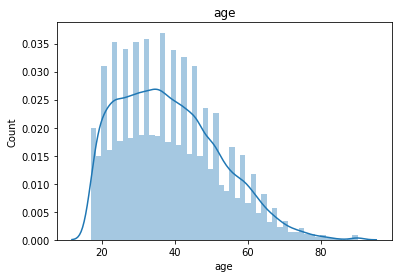

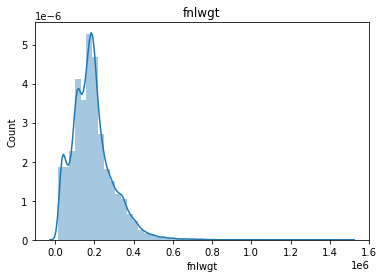

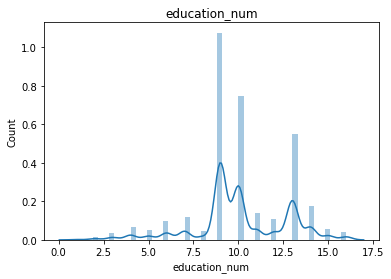

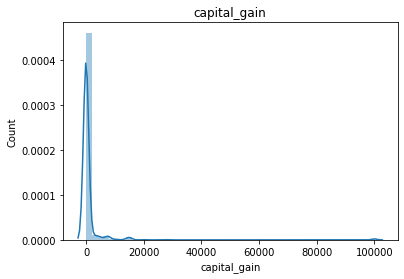

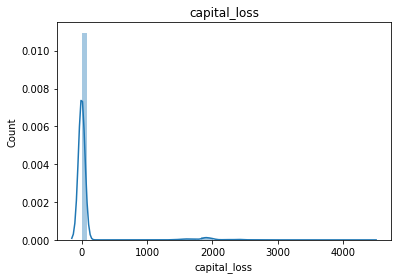

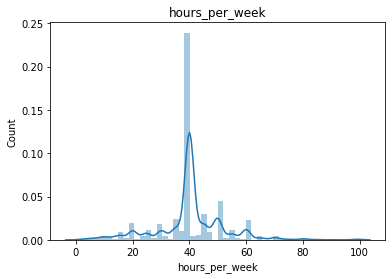

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in numerical:
  fig, ax = plt.subplots(1,1)
  sns.distplot(data[var])
  plt.xlabel(var)
  plt.ylabel("Count")
  plt.title(var)
  fig.show()

In [112]:
X = data.drop(['income'], axis=1)
y = data['income']

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Umjesto uklanjanja redaka s nedostajućim podacima nadopunjujemo nedostajuće ćelije (eng. data imputation) s najčešćom kategorijom.

In [114]:
for df in [X_train, X_test]:
    df['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)  

In [118]:
# X_train.isna().sum()
# y_train.isna().sum()
# X_test.isna().sum()
# y_test.isna().sum()

In [119]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Kategoričke varijable kodiramo pomoću tzv. [one-hot](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) vektora.

*Primjer*:

Neka je BOJA kategorička varijabla koja poprima vrijednosti [*crvena*, *plava*, *zelena*]. U skupu podataka se u stupcu koji označava boju pojavljuju te vrijednosti. One-hot kodiranje bi pretvorilo ove tri kategorije u sljedeći oblik:
- *crvena* $⇒ [1, 0, 0]$,
- *plava* $⇒ [0, 1, 0]$,
- *zelena* $⇒ [0, 0, 1]$.

Jedinicom se označi klasa kojoj podatak pripada, a sve ostale koordinate sadržavaju nulu.

Sada u skupu podataka nemamo više jedan stupac s oznakom boje, nego stupac koji sadrži vektore ekvivalentne klasama boje, ili, češće, tri stupca koji sadrže koordinate vektora.

In [120]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [121]:
X_train.head(3)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0


Primijetimo da nam značajke stvorene one-hot kodiranjem (novi stupci koji sadrže koordinate one-hot vektora) predstavljaju binarne kategoričke varijable pripadnosti klasi (označene brojem, što algoritmi zahtijevaju - numerički ulaz). Nula označava *nepripadnost* klasi, a jedinica *pripadnost* klasi.

Podatke skaliramo prije ubacivanja u algoritam pomoću [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) objekta. Ovaj način skaliranja podataka je otporan na ekstremne vrijednosti (outliere) jer umjesto aritmetičke sredine i standardne devijacije koristi medijan i interkvartilni raspon.

In [122]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Koristimo [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) objekt kao klasifikator - Naivni Bayes koji pretpostavlja normalnu distribuciju numeričkih varijabli. Iako podaci nisu normalno distribuirani, i dalje ga možemo koristiti i postići zadovoljavajuću točnost. Koristimo ga zato što imamo numeričke (kontinuirane) varijable u skupu značajki, ne samo kategoričke.

In [123]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [124]:
y_pred = gnb.predict(X_test)
y_pred

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [125]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8083


Isprobajte što bi se dogodilo da umjesto ovog algoritma koristimo npr. [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html). Zašto se javlja greška?

In [127]:
# from sklearn.naive_bayes import MultinomialNB

# gnb_ = MultinomialNB()
# gnb_.fit(X_train, y_train)
# y_pred_ = gnb_.predict(X_test)
# print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_)))

## Analiza sentimenta

Analiza sentimenta jedan je od najpopularnijih problema obrade prirodnog jezika. U kontekstu strojnog učenja se spominje jer se nad ovakvim problemima često koriste algoritmi strojnog učenja. Jedan od tih algoritama je Naivni Bayes.

Radi se o problemu obrade prirodnog jezika koji je klasifikacijske prirode - pojedinim djelovima teksta (npr. rečenicama) pokušava se pridijeliti klasa (sentiment).

Skup podataka koji koristimo već je podijeljen u skup podatak za treniranje i testiranje. Radi se o listama rečenica s pripadnim klasama osjećaja.

In [128]:
train = pd.read_csv('train.txt', header=None, sep=';')
test = pd.read_csv('test.txt', header=None, sep=';')

In [129]:
train[:10]

,0,1
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


Procesiranje je nešto složenije u slučaju tekstualnih podataka. Primjenjujemo nekoliko standardnih strategija obrade teksta iz odručja obrade prirodnog jezika:
- izbacivanje interpunkcije
- izbacivanje tzv. **stop-riječi (eng. stopwords)** - najčešće riječi unutar jezika koje ne nose posebno značenje
- **tokenizacija (eng. tokenization)** - segmentiranje rečenica na riječi
- **"korjenovanje" (eng. stemming)** - zamjena riječi njenim korijenom koji nosi značenje (odbacivanje sufiksa, prefiksa i sličnih atributa/dodataka/promjena koje su posljedica gramatičkih pravila poput deklinacije i glagolskih vremena)

In [130]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
stemmer = PorterStemmer().stem


def process(dataset, print_=True):
  dataset.columns = ['sentence', 'sentiment']

  dataset['processed_sentence'] = dataset['sentence'].apply(lambda sentence: word_tokenize(sentence)) # tokenizacija
  dataset['processed_sentence'] = dataset['processed_sentence'].apply(lambda words: [stemmer(word) for word in words if word not in stops]) # stemming & izbacivanje stop-riječi
  dataset['processed_sentence'] = dataset['processed_sentence'].apply(lambda s: ' '.join(s)) # vraćanje rečenice iz oblika liste u oblik stringa
  if print_:
    print('processed sentences:\n', dataset.head(2))
    print()

    print('sentiment counts:\n', dataset['sentiment'].value_counts())
    print()
  dataset['sentiment'] = dataset['sentiment'].apply(lambda s: 0 if s=='joy' else(1 if s=='sadness' else(2))) # spajanje klasa s premalo elemenata u novu klasu
  if print_:
    print('sentiment counts after relabelling:\n', dataset['sentiment'].value_counts())
    print()

  return dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [131]:
print_ = True

train = process(train.copy(), print_)
test = process(test.copy(), print_)

processed sentences:
                                             sentence sentiment  \
0                            i didnt feel humiliated   sadness   
1  i can go from feeling so hopeless to so damned...   sadness   

                                  processed_sentence  
0                                  didnt feel humili  
1  go feel hopeless damn hope around someon care ...  

sentiment counts:
 joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: sentiment, dtype: int64

sentiment counts after relabelling:
 2    5972
0    5362
1    4666
Name: sentiment, dtype: int64

processed sentences:
                                             sentence sentiment  \
0  im feeling rather rotten so im not very ambiti...   sadness   
1          im updating my blog because i feel shitty   sadness   

                      processed_sentence  
0  im feel rather rotten im ambiti right  
1              im updat blog feel shitti  

sentiment co

U ovom skupu podataka je prisutan disbalans, odnosno podaci nisu balansirani po klasama (nije (približno) jednak broj uzoraka koji pripadaju pojedinim klasama). Pogledajmo kakav to utjecaj ima na točnost klasifikacije.

- U jednom slučaju ostavljamo podatke kakvi jesu.
- U drugom slučaju grupiramo klase s manjim brojem uzoraka u jednu novu klasu koju nazivamo "other".

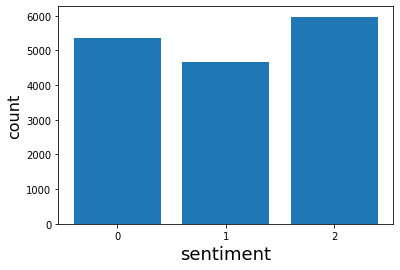

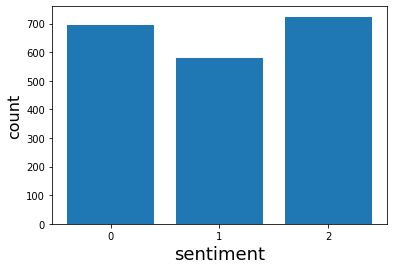

In [134]:
import matplotlib.pyplot as plt

for dataset in [train, test]:
  temp_ = pd.DataFrame(dataset['sentiment'].value_counts()).reset_index(drop=False)
  temp_.columns = ['sentiment', 'count']

  plt.bar(temp_['sentiment'], temp_['count'], tick_label=temp_['sentiment'])
  plt.xlabel('sentiment', fontsize=18)
  plt.ylabel('count', fontsize=16)
  plt.show()

Još jedna standardna praksa u obradi prirodnog jezika je **vektorizacija teksta**, odnosno kodiranje teksta (poput kategoričkih varijabli) u numeričku aproksimaciju/reprezentant. Za ove svrhe se može koristiti npr. one-hot vektorizacija, ali time bismo dobili jako duge vektore (u tekstu ima jako puno različitih riječi)!

Bolje rezultate je u praksi pokazala [tf-idf vektorizacija](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) (term frequency - inverse document frequency) koja u obzir uzima učestalost pojave određene riječi u tekstu.

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

tfidf = TfidfVectorizer().fit(train['processed_sentence'])

tfidf_train = tfidf.transform(train['processed_sentence']).toarray()
tfidf_test = tfidf.transform(test['processed_sentence']).toarray()

In [139]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(tfidf_train, train['sentiment'])

predicted_NB = NB.predict(tfidf_test)

print(classification_report(test['sentiment'], predicted_NB))

              precision    recall  f1-score   support

           0       0.62      0.37      0.47       695
           1       0.36      0.77      0.49       581
           2       0.53      0.25      0.34       724

    accuracy                           0.44      2000
   macro avg       0.50      0.47      0.43      2000
weighted avg       0.51      0.44      0.43      2000



Zašto smo sad dobili loše rezultate? Zato što ne radimo s numeričkim varijablama, nego s tekstom koji podrazumijeva [kategoričku distribuciju](https://www.statology.org/categorical-distribution/) (poseban slučaj multinomijalne).

In [140]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(tfidf_train, train['sentiment'])

predicted_NB = NB.predict(tfidf_test)

print(classification_report(test['sentiment'], predicted_NB))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       695
           1       0.95      0.77      0.85       581
           2       0.77      0.90      0.83       724

    accuracy                           0.85      2000
   macro avg       0.86      0.84      0.85      2000
weighted avg       0.86      0.85      0.85      2000



#### S originalnim klasama

In [141]:
train = pd.read_csv('train.txt', header=None, sep=';')
test = pd.read_csv('test.txt', header=None, sep=';')

train.columns = ['sentence', 'sentiment']
test.columns = ['sentence', 'sentiment']

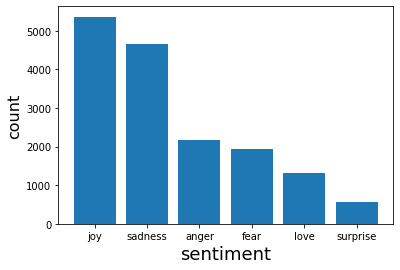

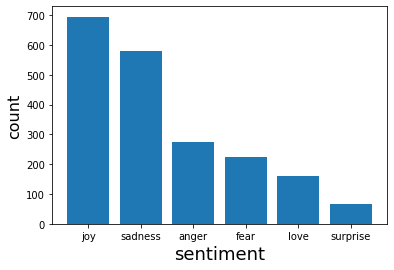

In [142]:
for dataset in [train, test]:
  temp_ = pd.DataFrame(dataset['sentiment'].value_counts()).reset_index(drop=False)
  temp_.columns = ['sentiment', 'count']

  plt.bar(temp_['sentiment'], temp_['count'])
  plt.xlabel('sentiment', fontsize=18)
  plt.ylabel('count', fontsize=16)
  plt.show()

In [143]:
stemmer = PorterStemmer().stem
stops = set(stopwords.words('english'))

In [144]:
def process2(dataset):
  dataset['processed_sentence'] = dataset['sentence'].apply(lambda sentence: word_tokenize(sentence))
  dataset['processed_sentence'] = dataset['processed_sentence'].apply(lambda words: [stemmer(word) for word in words if word not in stops])
  dataset['processed_sentence'] = dataset['processed_sentence'].apply(lambda s: ' '.join(s))
  
  return dataset

In [145]:
train, test = process2(train.copy()), process2(test.copy())

In [146]:
tfidf = TfidfVectorizer().fit(train['processed_sentence'])

tfidf_train = tfidf.transform(train['processed_sentence']).toarray()
tfidf_test = tfidf.transform(test['processed_sentence']).toarray()

In [147]:
NB = MultinomialNB()
NB.fit(tfidf_train, train['sentiment'])

predicted_NB = NB.predict(tfidf_test)

print(classification_report(test['sentiment'], predicted_NB, zero_division=0))

              precision    recall  f1-score   support

       anger       0.93      0.33      0.48       275
        fear       0.92      0.31      0.47       224
         joy       0.65      0.98      0.78       695
        love       1.00      0.07      0.13       159
     sadness       0.68      0.90      0.78       581
    surprise       0.00      0.00      0.00        66

    accuracy                           0.69      2000
   macro avg       0.70      0.43      0.44      2000
weighted avg       0.73      0.69      0.63      2000



Vidimo da je model slabiji!